In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import os
import glob
import collections
import networkx as nx
import seaborn as sns
from pandas import DataFrame as DF

# Read in training data

In [2]:
# Read in train data
train_data = pd.read_csv('Train.csv',low_memory=False)
print('rows:',len(train_data ))
train_data.head()

rows: 26048


,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


# Define the dependent variable

In [3]:
train_data['netgain']=train_data['netgain'].astype('str')
train_data.netgain[train_data.netgain == 'True'] = 1
train_data.netgain[train_data.netgain == 'False'] = 0
train_data['netgain']=train_data['netgain'].astype('int')
train_data.head()

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,0
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,0
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,0
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,0
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,1


# Datasets Exploration and Datasets Processing

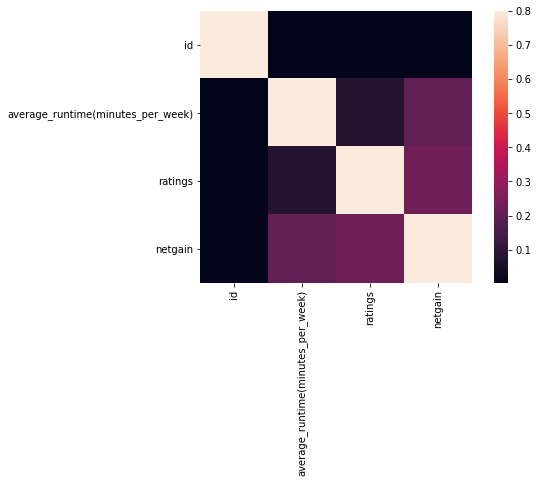

In [4]:
#correlation matrix
corrmat = train_data.corr()
plt.subplots(figsize=(8, 5))
sns.heatmap(corrmat, vmax=.8, square=True);

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1440x1440 with 0 Axes>

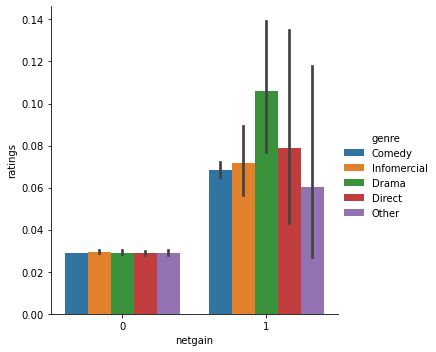

In [5]:
# Ratings v.s. net gain v.s. genre
plt.figure(figsize=(20,20))
sns.factorplot(data=train_data,x='netgain',y='ratings',hue='genre',kind='bar')

<Figure size 1080x1080 with 0 Axes>

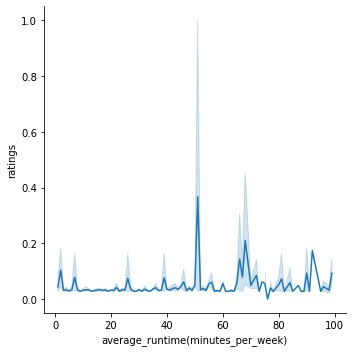

In [6]:
# Ratings v.s. average_runtime(minutes_per_week)
plt.figure(figsize=(15,15))
sns.relplot(x='average_runtime(minutes_per_week)', y='ratings', data=train_data,kind='line')

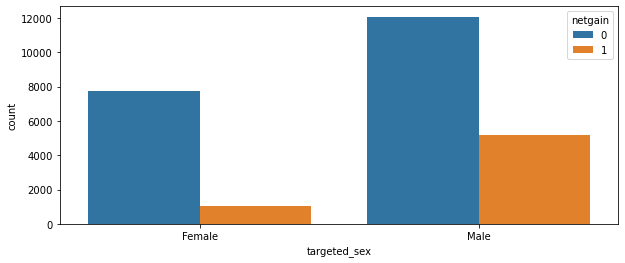

In [7]:
#Net gain V.S. target sex
plt.figure(figsize=(10,4))
g=sns.countplot(x='targeted_sex',data=train_data,order=train_data['targeted_sex'].value_counts().sort_values().index,hue=train_data.netgain)



/opt/anaconda/envs/Python3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


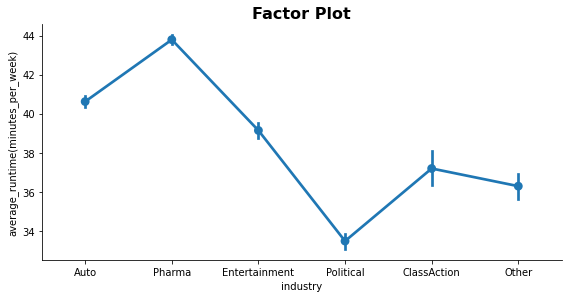

In [8]:
#Average runtime, net gain and industries
sns.factorplot(data=train_data,x='industry',y='average_runtime(minutes_per_week)',height=4,aspect=2)
plt.title('Factor Plot', weight='bold', fontsize=16)
plt.show()

# Missing value check

In [9]:
print(train_data.dtypes)
train_missing = train_data.isnull().sum().sort_values(ascending=False)
train_missing

id                                     int64
realtionship_status                   object
industry                              object
genre                                 object
targeted_sex                          object
average_runtime(minutes_per_week)      int64
airtime                               object
airlocation                           object
ratings                              float64
expensive                             object
money_back_guarantee                  object
netgain                                int64
dtype: object


netgain                              0
money_back_guarantee                 0
expensive                            0
ratings                              0
airlocation                          0
airtime                              0
average_runtime(minutes_per_week)    0
targeted_sex                         0
genre                                0
industry                             0
realtionship_status                  0
id                                   0
dtype: int64

# one-hot encoding

In [10]:
encoded_data = pd.get_dummies(train_data)
encoded_data.head()
#encoded_train_data.columns

,id,average_runtime(minutes_per_week),ratings,netgain,realtionship_status_Divorced,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Separated,...,airlocation_Thailand,airlocation_Trinadad&Tobago,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,expensive_High,expensive_Low,expensive_Medium,money_back_guarantee_No,money_back_guarantee_Yes
0,19717,45,0.027465,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,31593,45,0.027465,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,5681,45,0.027465,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,15491,40,0.027465,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
4,23587,48,0.027465,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [11]:
from pandas.core.frame import DataFrame
columns_list=encoded_data.columns.tolist()
columns_list2=DataFrame(columns_list)
columns_list2

,0
0,id
1,average_runtime(minutes_per_week)
2,ratings
3,netgain
4,realtionship_status_Divorced
...,...
69,expensive_High
70,expensive_Low
71,expensive_Medium
72,money_back_guarantee_No


# Multi-collinearity Check and processing

In [12]:
#replace specical characters that in the dataframe with "_"
import re
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
columns_list
columns_list_st = ",".join(columns_list)
columns_list_st2=re.sub(r'[-%()&]', '_',columns_list_st)
columns_list_st2
columns_list2 = columns_list_st2.split(",")
encoded_data.columns= columns_list2

df=encoded_data._get_numeric_data()
df2=df.drop(columns=['netgain','id'])
df2_list=df2.columns.tolist()

#Step 1: Run a multiple regression
#gather features
features = "+".join(df2_list)
# get y and X dataframes based on this regression:
y, X = dmatrices('netgain ~' + features, df, return_type='dataframe')

#Step 2: Calculate VIF Factors

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

#Step 3: Inspect VIF Factors
vif.round(1)


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.0,Intercept
1,1.2,average_runtime_minutes_per_week_
2,1.0,ratings
3,inf,realtionship_status_Divorced
4,inf,realtionship_status_Married_AF_spouse
...,...,...
68,inf,expensive_High
69,inf,expensive_Low
70,inf,expensive_Medium
71,inf,money_back_guarantee_No


In [13]:
columns_list2 

['id',
 'average_runtime_minutes_per_week_',
 'ratings',
 'netgain',
 'realtionship_status_Divorced',
 'realtionship_status_Married_AF_spouse',
 'realtionship_status_Married_civ_spouse',
 'realtionship_status_Married_spouse_absent',
 'realtionship_status_Never_married',
 'realtionship_status_Separated',
 'realtionship_status_Widowed',
 'industry_Auto',
 'industry_ClassAction',
 'industry_Entertainment',
 'industry_Other',
 'industry_Pharma',
 'industry_Political',
 'genre_Comedy',
 'genre_Direct',
 'genre_Drama',
 'genre_Infomercial',
 'genre_Other',
 'targeted_sex_Female',
 'targeted_sex_Male',
 'airtime_Daytime',
 'airtime_Morning',
 'airtime_Primetime',
 'airlocation_Cambodia',
 'airlocation_Canada',
 'airlocation_China',
 'airlocation_Columbia',
 'airlocation_Cuba',
 'airlocation_Dominican_Republic',
 'airlocation_Ecuador',
 'airlocation_El_Salvador',
 'airlocation_England',
 'airlocation_France',
 'airlocation_Germany',
 'airlocation_Greece',
 'airlocation_Guatemala',
 'airlocatio

In [14]:
# drop the multi-collinearical features 
encoded_data=encoded_data.drop(['realtionship_status_Widowed','industry_Political','genre_Other','targeted_sex_Male','airtime_Primetime','airlocation_Yugoslavia','expensive_Medium','money_back_guarantee_Yes'],axis=1)
#Re-calculate the VIF score 

df2=encoded_data._get_numeric_data()
df3=df2.drop(columns=['netgain','id'])
df3_list=df3.columns.tolist()
#Step 1: Run a multiple regression
#gather features
features = "+".join(df3_list)
# get y and X dataframes based on this regression:
y, X = dmatrices('netgain ~' + features, df2, return_type='dataframe')

#Step 2: Calculate VIF Factors

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

#Step 3: Inspect VIF Factors
vif.round(1)




,VIF Factor,features
0,1282.1,Intercept
1,1.2,average_runtime_minutes_per_week_
2,1.0,ratings
3,5.1,realtionship_status_Divorced
4,1.1,realtionship_status_Married_AF_spouse
...,...,...
60,104.2,airlocation_United_States
61,3.5,airlocation_Vietnam
62,2.6,expensive_High
63,2.8,expensive_Low


In [15]:
vif[vif['VIF Factor']>=10]


,VIF Factor,features
0,1282.141523,Intercept
5,45.900702,realtionship_status_Married_civ_spouse
13,36.676861,industry_Pharma
14,15.474773,genre_Comedy
17,11.680404,genre_Infomercial
40,20.044934,airlocation_International
47,22.378333,airlocation_Mexico
60,104.237785,airlocation_United_States


In [16]:
# drop the multi-collinearical features 
encoded_data=encoded_data.drop(['realtionship_status_Married_civ_spouse','industry_Pharma','genre_Comedy','genre_Infomercial','airlocation_International','airlocation_Mexico','airlocation_United_States'],axis=1)
#Re-calculate the VIF score 

df3=encoded_data._get_numeric_data()
df4=df3.drop(columns=['netgain','id'])
df4_list=df4.columns.tolist()
#Step 1: Run a multiple regression
#gather features
features = "+".join(df4_list)
# get y and X dataframes based on this regression:
y, X = dmatrices('netgain ~' + features, df3, return_type='dataframe')

#Step 2: Calculate VIF Factors

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

#Step 3: Inspect VIF Factors
vif.round(1)
vif[vif['VIF Factor']>=10]



,VIF Factor,features
0,29.626206,Intercept


# Class balance check and processing

In [17]:
encoded_data.head()

,id,average_runtime_minutes_per_week_,ratings,netgain,realtionship_status_Divorced,realtionship_status_Married_AF_spouse,realtionship_status_Married_spouse_absent,realtionship_status_Never_married,realtionship_status_Separated,industry_Auto,...,airlocation_Puerto_Rico,airlocation_Scotland,airlocation_South,airlocation_Taiwan,airlocation_Thailand,airlocation_Trinadad_Tobago,airlocation_Vietnam,expensive_High,expensive_Low,money_back_guarantee_No
0,19717,45,0.027465,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,31593,45,0.027465,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,5681,45,0.027465,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,15491,40,0.027465,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
4,23587,48,0.027465,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [18]:
encoded_data['netgain'].value_counts()

0    19853
1     6195
Name: netgain, dtype: int64

In [19]:
# Class balance
#Class count
count_class_0=19853
count_class_1=6195

# Divide by class
df_class_0 = encoded_data[encoded_data['netgain'] == 0]
df_class_1 = encoded_data[encoded_data['netgain'] == 1]
#sampling the bigger class
df_class_0_under = df_class_0.sample(9293)# 0:1=6:4
balanced_encoded_data = pd.concat([df_class_0_under, df_class_1], axis=0)

balanced_encoded_data['netgain'].value_counts()


0    9293
1    6195
Name: netgain, dtype: int64

# Split into train and validation set

In [20]:
from sklearn.model_selection import train_test_split
dependent_all=balanced_encoded_data['netgain']
independent_all=balanced_encoded_data.drop(["id",'netgain'], axis=1)
x_train,x_test,y_train,y_test = train_test_split(independent_all,dependent_all,test_size=0.3,random_state=10011)

# Define the classifiers that will be used 

In [21]:
pip install xgboost


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

Note: you may need to restart the kernel to use updated packages.


In [22]:
# Define the classifiers that will be used 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier  

classifiers=[DecisionTreeClassifier(random_state=10011),SVC(random_state=10011),RandomForestClassifier(random_state=10011),\
             AdaBoostClassifier(random_state=10011),GaussianNB(var_smoothing=1e-09),LogisticRegression(random_state=10011), \
             KNeighborsClassifier(n_neighbors=5),XGBClassifier(random_state=10011)]

In [23]:
# def get_feature_names
def get_feature_names():
    return X_train.columns


# Calculate the precision score, accuracy and F1 score of each classifier

In [24]:
#calculate accurancy
from sklearn.model_selection import cross_val_score 
clf_score=[]
for clf in classifiers:
    #clf.fit(x_train,y_train)
    score=cross_val_score(clf,x_train,y_train,cv=5)
    clf_score.append(score)
    
#calculate precision  
clf_score2=[]
for clf in classifiers:
    #clf.fit(x_train,y_train)
    score2=cross_val_score(clf,x_train,y_train,cv=5,scoring="precision")
    clf_score2.append(score2)

#calculate F1 score  
clf_score3=[]   
for clf in classifiers:
    #clf.fit(x_train,y_train)
    score3=cross_val_score(clf,x_train,y_train,cv=5,scoring="f1")
    clf_score3.append(score3)


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

# Print accuracy of each classifier

In [25]:
print(clf_score)
# Calcultate the average accurancy for each algorithm after cross validation
Average_score=[sum(clf)/len(clf) for clf in clf_score]
Average_score

[array([0.75795297, 0.74815498, 0.75092251, 0.75553506, 0.75461255]), array([0.67819272, 0.69234317, 0.6900369 , 0.67389299, 0.69234317]), array([0.76579069, 0.75322878, 0.76706642, 0.76476015, 0.76107011]), array([0.78515445, 0.76245387, 0.79243542, 0.77306273, 0.77167897]), array([0.54541263, 0.61208487, 0.50369004, 0.49630996, 0.51245387]), array([0.76947902, 0.74538745, 0.77675277, 0.75415129, 0.75138376]), array([0.71046565, 0.71863469, 0.73846863, 0.70710332, 0.71632841]), array([0.77823882, 0.76568266, 0.78505535, 0.77398524, 0.77998155])]


[0.7534356131943063,
 0.6853617903398951,
 0.762383229641425,
 0.7769570890729653,
 0.5339902755874031,
 0.7594308598687647,
 0.7182001415449839,
 0.7765887233561133]

# Print precision score of each classifier

In [26]:
print(clf_score2)
# Calcultate the average presion score for each algorithm after cross validation
Average_score2=[sum(clf)/len(clf) for clf in clf_score2]
Average_score2

[array([0.67346939, 0.66094854, 0.66944734, 0.66971545, 0.668357  ]), array([0.65377532, 0.69111969, 0.69416499, 0.64672897, 0.68274583]), array([0.68158698, 0.66336634, 0.68672199, 0.67842742, 0.67265469]), array([0.70716511, 0.67712551, 0.71865121, 0.68674699, 0.6858006 ]), array([0.46572238, 0.50749064, 0.44409115, 0.43897216, 0.44723893]), array([0.68756423, 0.65449161, 0.69740933, 0.66633166, 0.66233766]), array([0.6405694 , 0.63995609, 0.66230937, 0.62245989, 0.64527421]), array([0.69753086, 0.6779661 , 0.70977918, 0.68965517, 0.69486405])]


[0.6683875421385693,
 0.6737069601817047,
 0.6765514833890671,
 0.6950978838180907,
 0.46070305147961665,
 0.6736268980925499,
 0.6421137921665475,
 0.6939590732910667]

# Print F1 score of each classifier

In [27]:
print(clf_score3)
# Calcultate the f1 score for each algorithm
Average_score3=[sum(clf)/len(clf) for clf in clf_score3]
Average_score3

[array([0.71544715, 0.70581897, 0.70394737, 0.71320346, 0.71243243]), array([0.50426136, 0.51771511, 0.50660793, 0.49463903, 0.52459016]), array([0.72510823, 0.71466667, 0.72389284, 0.72521552, 0.72240086]), array([0.74507659, 0.72207232, 0.75192944, 0.73548387, 0.73344103]), array([0.62509506, 0.65910012, 0.60901163, 0.60029283, 0.60750093]), array([0.72796518, 0.70607029, 0.73551913, 0.71328671, 0.71099196]), array([0.6323185 , 0.65653153, 0.68199663, 0.64702613, 0.64264962]), array([0.73816004, 0.72805139, 0.74339207, 0.73513514, 0.74313409])]


[0.7101698768091469,
 0.5095627194076926,
 0.7222568208163087,
 0.7376006488396024,
 0.6202001121295536,
 0.7187666526314498,
 0.6521044831050947,
 0.7375745456538835]

# Tune hyper parameters of logistic model

In [28]:
# Use GridSearchCV to tune hyper parameters
from sklearn.model_selection import GridSearchCV

In [29]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create logistic regression
from sklearn import linear_model
logistic = linear_model.LogisticRegression()

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(x_train, y_train)

#View Hyperparameter Values Of the Best Model
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: Converg

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

Best Penalty: l2
Best C: 10000.0


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

In [30]:
#View Hyperparameter Values Of the Best Model
best_model.best_estimator_

LogisticRegression(C=10000.0)

# Test the model on hold-out set (logistic)

In [31]:
#Accuracy of test data
score2 = best_model.score(x_test,y_test)
print('Accuracy of test data: ',score2)
#Accuracy of train data
score3 = best_model.score(x_train,y_train)
print('Accuracy of train data: ',score3)

Accuracy of test data:  0.7813643210673553
Accuracy of train data:  0.7775112996956001


# Tune hyper parameters of AdaBoost model and fit test data

In [32]:
clf3 = GridSearchCV(cv=5, estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(),
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'base_estimator__criterion': ['gini', 'entropy'],
                         'base_estimator__splitter': ['best', 'random'],
                         'n_estimators': [50,25,75]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
clf3.fit(x_train,y_train)
y_pred = clf3.predict(x_test)
print('Score of train data：', clf3.score(x_train,y_train),'Score of test data',clf3.score(x_test,y_test))
clf3.best_params_

Score of train data： 0.8391292316206992 Score of test data 0.7555412093823972


{'base_estimator__criterion': 'entropy',
 'base_estimator__splitter': 'best',
 'n_estimators': 50}

# Tune hyper parameters of XGBoost model and fit test data

In [40]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
folds = 5
param_comb = 5

#skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=4, cv=5, verbose=3,random_state=1001 )

random_search.fit(x_train,y_train)
print('Score of train data：', random_search.score(x_train,y_train),'Score of test data',random_search.score(x_test,y_test))
 # timing ends here for "start_time" variable
random_search.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:   57.1s finished


[14:08:00] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Score of train data： 0.7866432985886911 Score of test data 0.785237787820099


{'subsample': 0.8,
 'min_child_weight': 1,
 'max_depth': 4,
 'gamma': 1,
 'colsample_bytree': 1.0}

# Present Results-XGBoost

Text(0.5, 1.0, 'Confusion Matrix')

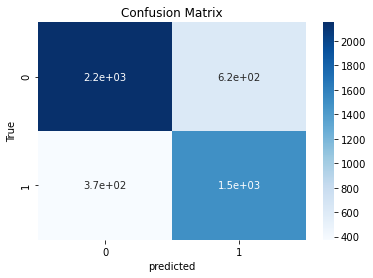

In [41]:
# The predict result of the best_model
BM_preict1= random_search.predict(x_test)
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,BM_preict1)
# Plot Confusion Matrix
import seaborn as sns
ax=plt.subplot()
sns.heatmap(cm1,annot=True,ax=ax,cmap="Blues");
#set lables, title and ticks
ax.set_xlabel("predicted");ax.set_ylabel("True");
ax.set_title("Confusion Matrix")



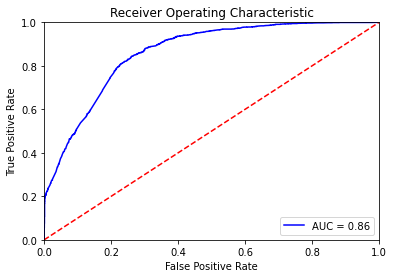

In [42]:
# ROC curve
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve

probs = random_search.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Plot classifier ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [46]:
BM_preict1

array([0, 1, 1, ..., 0, 1, 1])

In [43]:
# plot classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, BM_preict1))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      2775
           1       0.71      0.80      0.75      1872

    accuracy                           0.79      4647
   macro avg       0.78      0.79      0.78      4647
weighted avg       0.79      0.79      0.79      4647



# Feature importance

[14:14:30] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0.01951905 0.0623463  0.08386287 0.00695642 0.01048724 0.25352988
 0.03004794 0.067706   0.01998564 0.05395269 0.04401792 0.00521925
 0.00590124 0.05974224 0.00746121 0.1101421  0.         0.0065881
 0.00507885 0.00627301 0.00461807 0.00527171 0.00471446 0.00402738
 0.00484278 0.00377409 0.00335525 0.         0.00574754 0.003683
 0.         0.         0.         0.         0.00643331 0.
 0.         0.00458346 0.00739163 0.00646502 0.00500949 0.00494716
 0.         0.         0.00799832 0.00501563 0.         0.00609562
 0.00485492 0.00742665 0.00784134 0.         0.         0.0067161
 0.00969572 0.00579672 0.00487675]


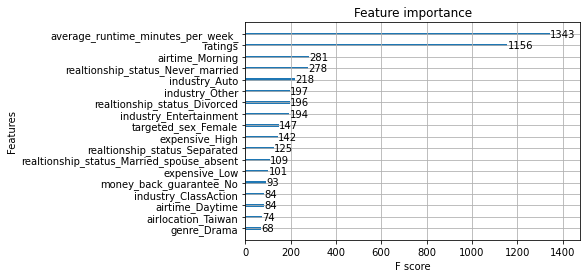

In [44]:
# weight-based importance

final_model=random_search.best_estimator_

from xgboost import plot_importance
from matplotlib import pyplot
final_model.fit(x_train,y_train)
print(final_model.feature_importances_)
# plot
plot_importance(final_model,max_num_features=18)
pyplot.show()



[14:14:42] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0.01951905 0.0623463  0.08386287 0.00695642 0.01048724 0.25352988
 0.03004794 0.067706   0.01998564 0.05395269 0.04401792 0.00521925
 0.00590124 0.05974224 0.00746121 0.1101421  0.         0.0065881
 0.00507885 0.00627301 0.00461807 0.00527171 0.00471446 0.00402738
 0.00484278 0.00377409 0.00335525 0.         0.00574754 0.003683
 0.         0.         0.         0.         0.00643331 0.
 0.         0.00458346 0.00739163 0.00646502 0.00500949 0.00494716
 0.         0.         0.00799832 0.00501563 0.         0.00609562
 0.00485492 0.00742665 0.00784134 0.         0.         0.0067161
 0.00969572 0.00579672 0.00487675]


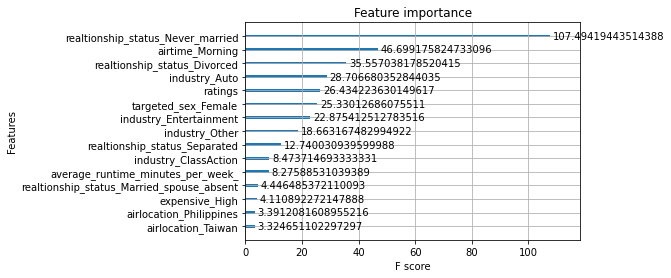

In [45]:
# gain-based importance
final_model.fit(x_train,y_train)
print(final_model.feature_importances_)
# plot
plot_importance(final_model,max_num_features=15,importance_type='gain')
pyplot.show()